## スパース行列

In [25]:
from scipy import sparse
import numpy as np

print(np.zeros((3,4)))

a=sparse.lil_matrix((3,4))
a[0,1]=2 
a[2,3]=5
a[1,3]=3
print(a.toarray())


b=sparse.lil_matrix((4,5))
b[1,3]=3
b[0,1]=1
 
b[2,3]=6
print(b.toarray())

c=a.dot(b)
print(c.toarray())

# 一度変換しておくと、計算が早くなる
# csr_matrix
a1=a.tocsr() 
b1=b.tocsr()
c1=a1.dot(b1) 
print(c1.toarray())

# csc_matrix
a2=a.tocsc()
b2=b.tocsc()
c2=a2.dot(b2) 
print(c1.toarray())



[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 5.]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### csc_matrix getcol  
### csr_matrix getrow

In [30]:
a=sparse.lil_matrix((3,4))
a[0,1]=2 
a[2,3]=5
a[1,3]=3
print(a.toarray())

a1=a.tocsr()
a2=a.tocsc()
print(type(a1))
print(type(a2))

b1=a1.getrow(1)
b2=a2.getcol(3)

print(b1.toarray())
print(b2.toarray())

[[0. 2. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 5.]]
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'>
[[0. 0. 0. 3.]]
[[0.]
 [3.]
 [5.]]


In [40]:
# 逆行列
a=np.array([[3,3,3],[1,1,1],[2,1,2]])
print(np.linalg.inv(a))

# 一次方程式
a=np.array([[3,3,3],[1,1,1],[2,1,2]])
b=np.array([[1],[2],[3]])
print(np.linalg.solve(a,b))

# LU 分解
from scipy import linalg
lu , p =linalg.lu_factor(a)
print(linalg.lu_solve( (lu,p) , b))

[[ 6.00479950e+15 -1.80143985e+16  0.00000000e+00]
 [-0.00000000e+00  2.00000000e+00 -1.00000000e+00]
 [-6.00479950e+15  1.80143985e+16  1.00000000e+00]]
[[-3.00239975e+16]
 [ 1.00000000e+00]
 [ 3.00239975e+16]]
[[-3.00239975e+16]
 [ 1.00000000e+00]
 [ 3.00239975e+16]]


## 乱数

In [54]:
# 0,1で一様乱数の生成
print(np.random.rand())

print(np.random.rand(3,2))

print(np.random.rand(5))

# 整数値
print(np.random.randint(6))

print(np.random.randint(2,52))

print(np.random.randint(5,size=(2,3)))



0.6893141898742299
[[0.9791245  0.0025139 ]
 [0.64763171 0.30539838]
 [0.61508435 0.89076642]]
[0.06746255 0.76396031 0.96656475 0.24909651 0.27913548]
2
49
[[1 3 0]
 [1 2 4]]


## 数理最適化

###  線形計画問題

In [6]:
import numpy as np
from scipy import optimize

c=np.array([-3,-4],dtype=np.float64)
G=np.array([[1,4],[2,3],[2,1]],dtype=np.float64)
h=np.array([1700,1400,1000],dtype=np.float64)
sol=optimize.linprog(c,A_ub=G,b_ub=h,bounds=(0,None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688606


### 二次計画法

In [13]:
import cvxopt

# 専用のデータ型に変換する
P=cvxopt.matrix(np.array([[2,1],[1,2]],dtype=np.float64))
q=cvxopt.matrix(np.array([2,4],dtype=np.float64))

sol=cvxopt.solvers.qp(P,q)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))


P=cvxopt.matrix(np.array([[2,1],[1,2]],dtype=np.float64))
q=cvxopt.matrix(np.array([2,4],dtype=np.float64))
G=cvxopt.matrix(np.array([[2,3]],dtype=np.float64))
h=cvxopt.matrix(np.array([3],dtype=np.float64))

sol=cvxopt.solvers.qp(P,q,G=G,h=h)

print(np.array(sol['x']))
print(np.array(sol['primal objective']))


[[ 2.22044605e-16]
 [-2.00000000e+00]]
-4.0
     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  5e-18  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  3e-16  2e-16
 3: -4.0000e+00 -4.0007e+00  7e-04  1e-15  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  9e-16  2e-16
Optimal solution found.
[[-2.45940172e-09]
 [-2.00000001e+00]]
-4.0


### 勾配降下法

In [15]:
class GradientDescent:
    def __init__(self,f,df,alpha=0.01,eps=1e-6):
        self.f=f
        self.df=df
        self.alpha=alpha
        self.eps=eps
        self.path=None
        
    def solve(self,init):
        x=init
        path=[]
        grad=self.df(x)
        path.append(x)
        
        # dfのL2ノルムがeps 以下で終了
        while(grad**2).sum()>self.eps**2:
            x=x-self.alpha*grad
            grad=self.df(x)
            path.append(x)
        self.path_=np.array(path)
        self.x_=x
        self.opt_=self.f(x)

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


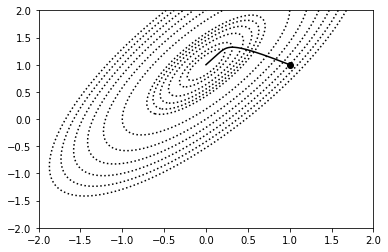

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

def f(xx):
    x=xx[0]
    y=xx[1]
    return 5*x**2-6*x*y+3*y**2+6*x-6*y

def df(xx):
    x=xx[0]
    y=xx[1]
    return np.array([10*x-6*y+6,-6*x+6*y-6])
    
algo=GradientDescent(f,df)
initial=np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0],initial[1],color='k',marker='o')
plt.plot(algo.path_[:,0],algo.path_[:,1],color='k',linewidth=1.5)
xs=np.linspace(-2,2,300)
ys=np.linspace(-2,2,300)
xmesh,ymesh=np.meshgrid(xs,ys)
xx=np.r_[xmesh.reshape(1,-1),ymesh.reshape(1,-1)]
levels=[-3,-2.9,-2.8,-2.6,-2.4,-2.2,-2,-1,0,1,2,3,4]
plt.contour(xs,ys,f(xx).reshape(xmesh.shape),levels=levels,colors='k',linestyles='dotted')

plt.show()

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


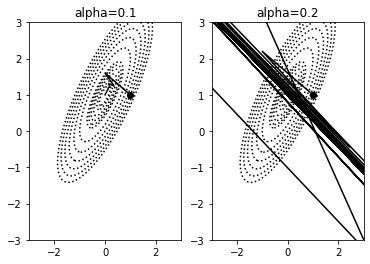

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)


xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4]
for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[
               :, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape),
                  levels=levels,
                  colors="k",  linestyles="dotted")


plt.show()
